# Graduate Admissions

### Context

This dataset is created for prediction of Graduate Admissions from an Indian perspective.

### Content

The dataset contains several parameters which are considered important during the application for Masters Programs. The parameters included are : 1. GRE Scores ( out of 340 ) 2. TOEFL Scores ( out of 120 ) 3. University Rating ( out of 5 ) 4. Statement of Purpose and Letter of Recommendation Strength ( out of 5 ) 5. Undergraduate GPA ( out of 10 ) 6. Research Experience ( either 0 or 1 ) 7. Chance of Admit ( ranging from 0 to 1 )

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
import numpy as np

graduate=pd.read_csv('Admission_Predict.csv')

In [27]:
graduate.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [28]:
graduate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
Serial No.           400 non-null int64
GRE Score            400 non-null int64
TOEFL Score          400 non-null int64
University Rating    400 non-null int64
SOP                  400 non-null float64
LOR                  400 non-null float64
CGPA                 400 non-null float64
Research             400 non-null int64
Chance of Admit      400 non-null float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [17]:
graduate.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [29]:
graduate.drop('Serial No.',axis=1, inplace=True)

In [30]:
graduate.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [33]:
graduate.isnull().any()

GRE Score            False
TOEFL Score          False
University Rating    False
SOP                  False
LOR                  False
CGPA                 False
Research             False
Chance of Admit      False
dtype: bool

In [38]:
graduate=graduate.rename(columns = {'Chance of Admit ':'Chance of Admit'})

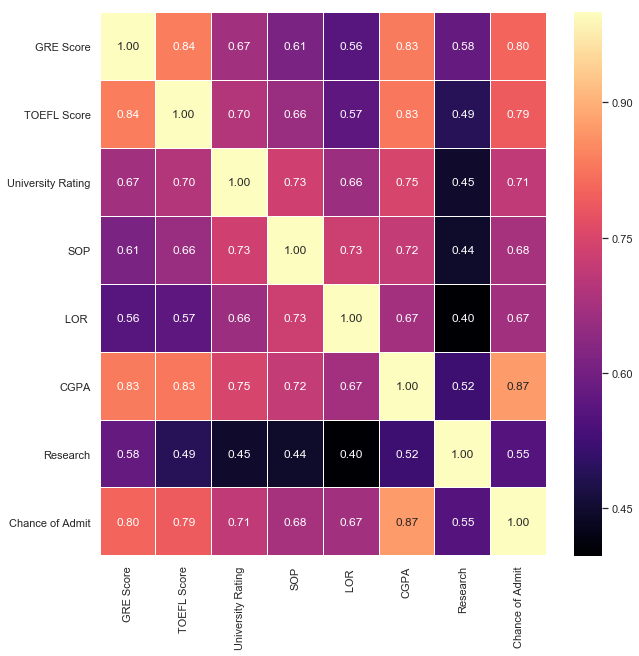

In [39]:
fig,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(graduate.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")
plt.show()


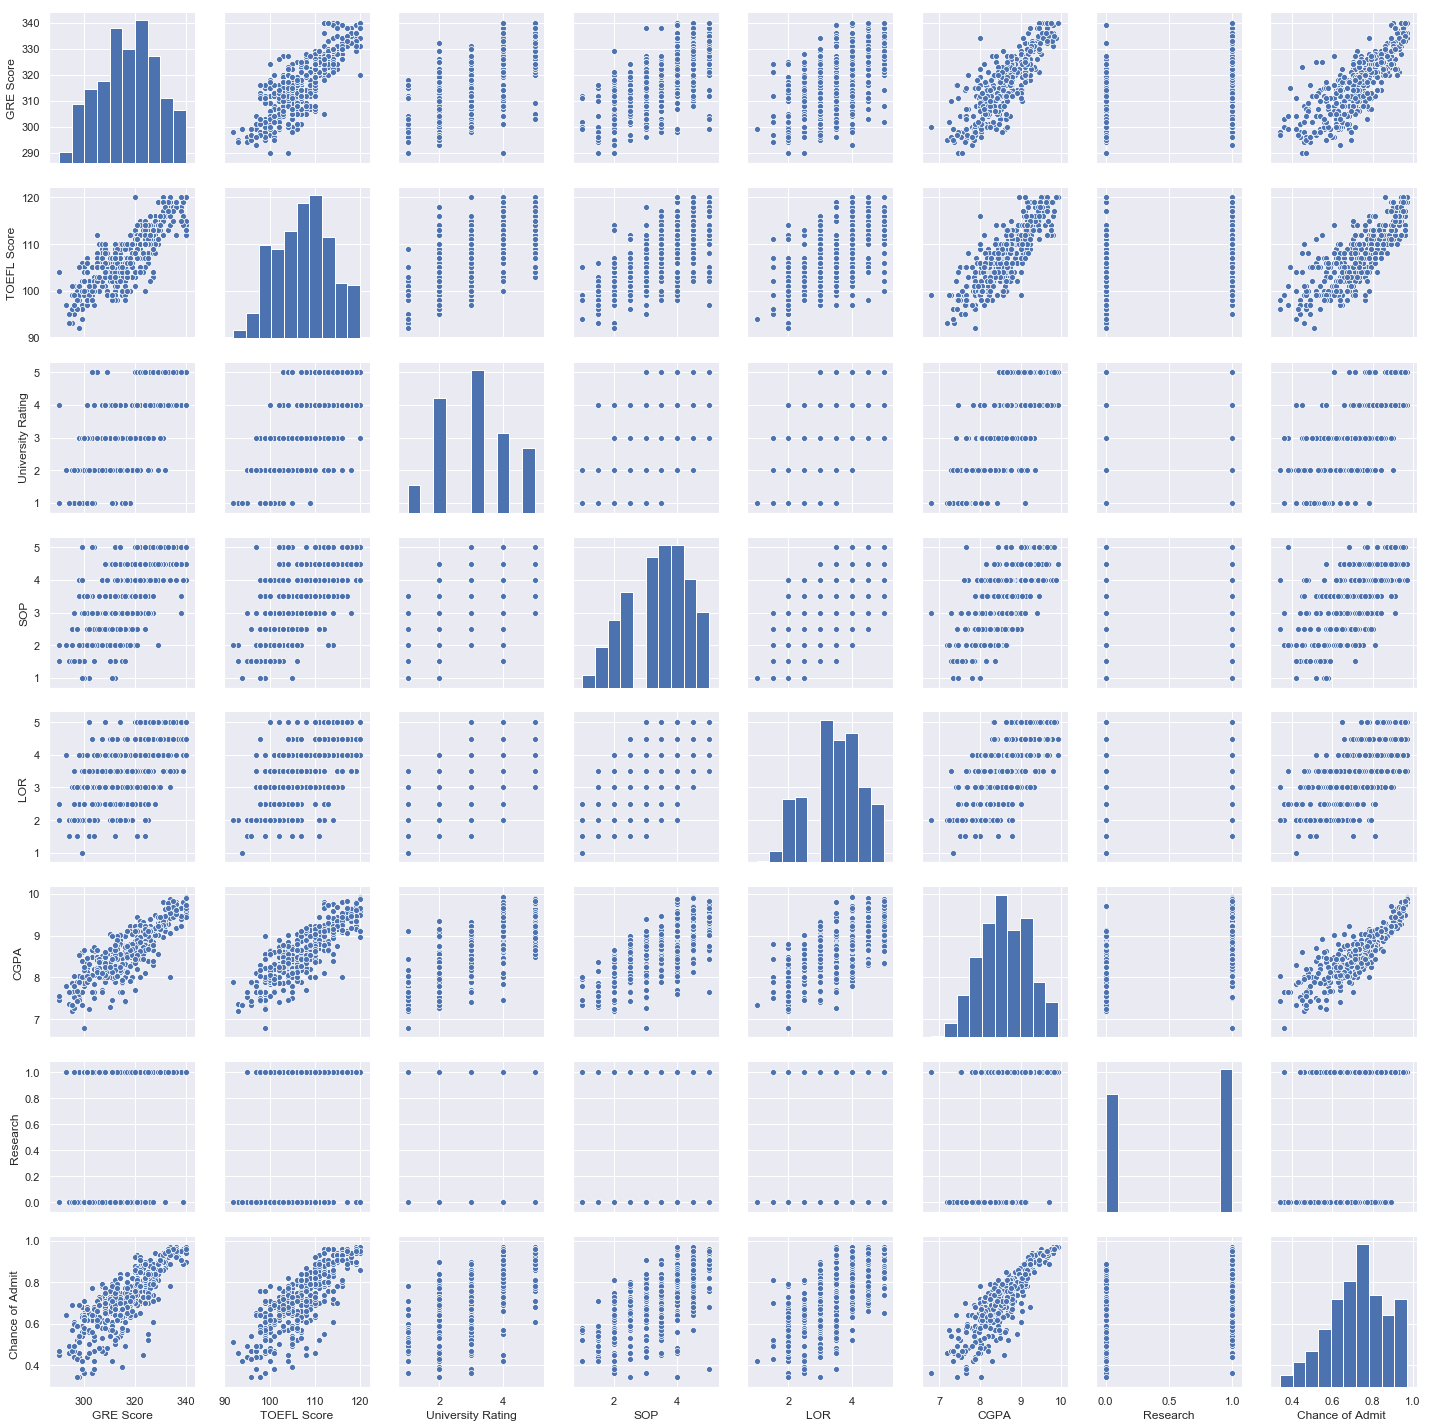

In [31]:
sns.pairplot(graduate)


# Linear Regression

In [52]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


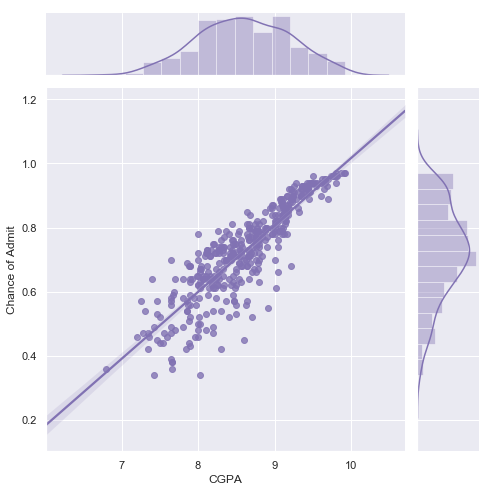

In [49]:
sns.jointplot("CGPA", "Chance of Admit", data=graduate, kind="reg", color="m", height=7)

In [56]:
X_cgpa=graduate[["CGPA"]]
y=graduate[["Chance of Admit"]]

X_cgpa_train,X_cgpa_test,y_train,y_test = train_test_split(X_cgpa,y,test_size=.3,random_state=42)

regr = LinearRegression()
regr.fit(X_cgpa_train, y_train)
y_pred= regr.predict(X_cgpa_test)


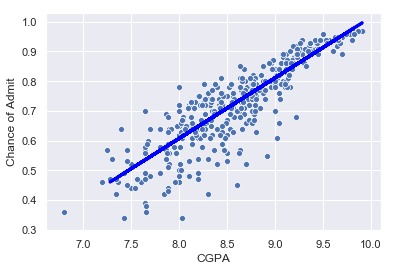

In [57]:
# Plot outputs
plt.figure()
plt.plot(X_cgpa_test,y_pred, color='blue', linewidth=3)
sns.scatterplot(x="CGPA", y="Chance of Admit" ,data=graduate)


In [63]:
# The coefficients
print('Coefficients: \n', regr.coef_,regr.intercept_)
# Explained variance score: 1 is perfect prediction
print('r2_score: %.2f' % r2_score(y_test, y_pred))

Coefficients: 
 [[0.20373738]] [-1.02241738]
r2_score: 0.75


Text(0, 0.5, 'Residuals')

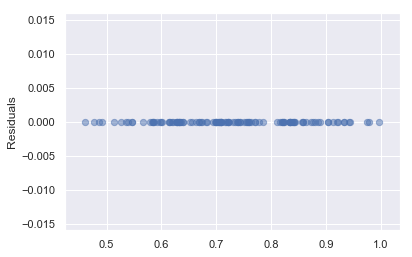

In [61]:
plt.scatter(regr.predict(X_cgpa_test),regr.predict(X_cgpa_test)-y_pred,c='b',s=40,alpha=0.5)
plt.ylabel('Residuals')

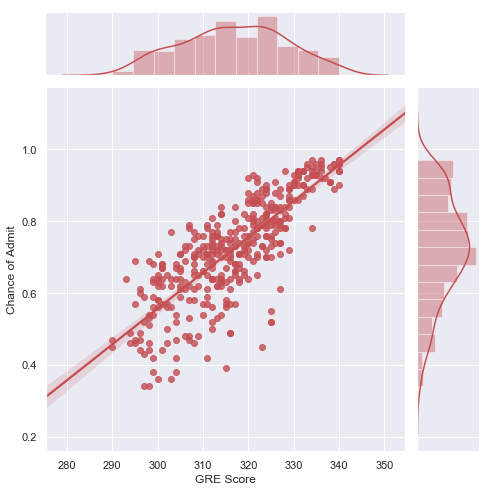

In [47]:
sns.jointplot("GRE Score", "Chance of Admit", data=graduate, kind="reg", color="r", height=7)

In [64]:
X_gre=graduate[["GRE Score"]]
y=graduate[["Chance of Admit"]]

X_gre_train,X_gre_test,y_train,y_test = train_test_split(X_gre,y,test_size=.3,random_state=42)

regr = LinearRegression()
regr.fit(X_gre_train, y_train)
y_pred= regr.predict(X_gre_test)


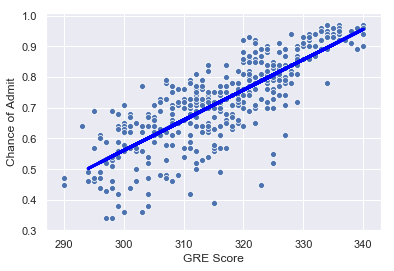

In [65]:
# Plot outputs
plt.figure()
plt.plot(X_gre_test,y_pred, color='blue', linewidth=3)
sns.scatterplot(x="GRE Score", y="Chance of Admit" ,data=graduate)


In [66]:
# The coefficients
print('Coefficients: \n', regr.coef_,regr.intercept_)
# Explained variance score: 1 is perfect prediction
print('r2_score: %.2f' % r2_score(y_test, y_pred))

Coefficients: 
 [[0.0098536]] [-2.39492238]
r2_score: 0.62


Text(0, 0.5, 'Residuals')

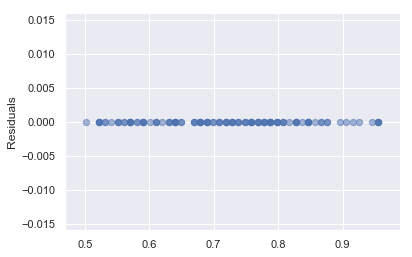

In [67]:
plt.scatter(regr.predict(X_gre_test),regr.predict(X_gre_test)-y_pred,c='b',s=40,alpha=0.5)
plt.ylabel('Residuals')

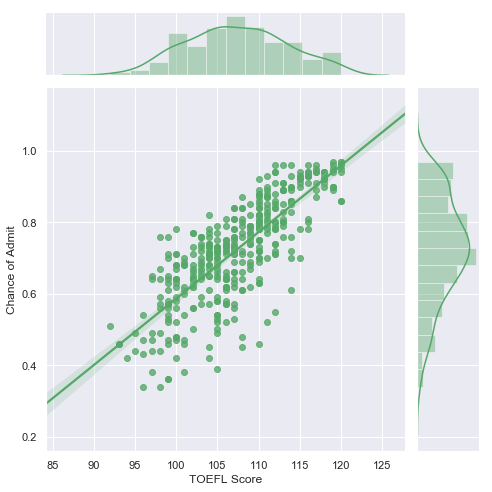

In [51]:
sns.jointplot("TOEFL Score", "Chance of Admit", data=graduate, kind="reg", color="g", height=7)

In [74]:
X_toefl=graduate[["TOEFL Score"]] 
y=graduate[["Chance of Admit"]]

X_toefl_train,X_toefl_test,y_train,y_test = train_test_split(X_toefl,y,test_size=.3,random_state=42)

regr = LinearRegression()
regr.fit(X_toefl_train, y_train)
y_pred= regr.predict(X_toefl_test)

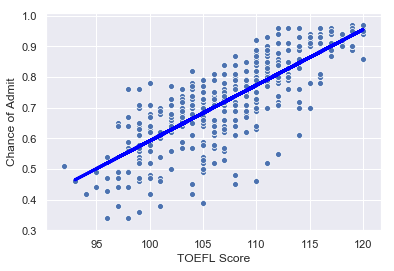

In [75]:
# Plot outputs
plt.figure()
plt.plot(X_toefl_test,y_pred, color='blue', linewidth=3)
sns.scatterplot(x="TOEFL Score", y="Chance of Admit" ,data=graduate)

In [76]:
# The coefficients
print('Coefficients: \n', regr.coef_,regr.intercept_)
# Explained variance score: 1 is perfect prediction
print('r2_score: %.2f' % r2_score(y_test, y_pred))

Coefficients: 
 [[0.01815427]] [-1.22356056]
r2_score: 0.63


Text(0, 0.5, 'Residuals')

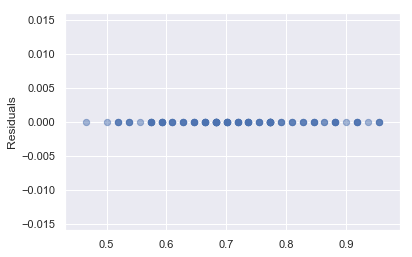

In [77]:
plt.scatter(regr.predict(X_toefl_test),regr.predict(X_toefl_test)-y_pred,c='b',s=40,alpha=0.5)
plt.ylabel('Residuals')

In the above we modelled considering each correlated separately and we have gained very useful insights. Now let us fit considering all feaures together  

# Regression

### Linear Regression

In [88]:
y = graduate["Chance of Admit"].values
x = graduate.drop(["Chance of Admit"],axis=1)

# separating train (80%) and test (%20) sets
from sklearn.model_selection import train_test_split

x_train, x_test,y_train, y_test = train_test_split(x,y,test_size = 0.20,random_state = 42)

Normalization (min-max scaling):It makes values scaled to a fixed range (0-1).



In [89]:
from sklearn.preprocessing import MinMaxScaler
scalerX = MinMaxScaler(feature_range=(0, 1))
x_train[x_train.columns] = scalerX.fit_transform(x_train[x_train.columns])
x_test[x_test.columns] = scalerX.transform(x_test[x_test.columns])


In [90]:
lr = LinearRegression()
lr.fit(x_train,y_train)
y_head_lr = lr.predict(x_test)

print("real value of y_test[1]: " + str(y_test[1]) + " -> the predict: " + str(lr.predict(x_test.iloc[[1],:])))
print("real value of y_test[2]: " + str(y_test[2]) + " -> the predict: " + str(lr.predict(x_test.iloc[[2],:])))

from sklearn.metrics import r2_score
print("r_2 score: ", r2_score(y_test,y_head_lr))

y_head_lr_train = lr.predict(x_train)
print("r_2 score (train dataset): ", r2_score(y_train,y_head_lr_train))

real value of y_test[1]: 0.68 -> the predict: [0.72368741]
real value of y_test[2]: 0.9 -> the predict: [0.93536809]
r_2 score:  0.821208259148699
r_2 score (train dataset):  0.7951946003191086


### Random Forest regression

In [91]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 100, random_state = 42)
rfr.fit(x_train,y_train)
y_head_rfr = rfr.predict(x_test) 

from sklearn.metrics import r2_score
print("r_2 score: ", r2_score(y_test,y_head_rfr))
print("real value of y_test[1]: " + str(y_test[1]) + " -> the predict: " + str(rfr.predict(x_test.iloc[[1],:])))
print("real value of y_test[2]: " + str(y_test[2]) + " -> the predict: " + str(rfr.predict(x_test.iloc[[2],:])))


y_head_rf_train = rfr.predict(x_train)
print("r_2 score (train dataset): ", r2_score(y_train,y_head_rf_train))


r_2 score:  0.8074111823415694
real value of y_test[1]: 0.68 -> the predict: [0.7249]
real value of y_test[2]: 0.9 -> the predict: [0.9407]
r_2 score (train dataset):  0.9634880602889714


### Decision Tree Regression

In [92]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state = 42)
dtr.fit(x_train,y_train)
y_head_dtr = dtr.predict(x_test) 

from sklearn.metrics import r2_score
print("r_2 score: ", r2_score(y_test,y_head_dtr))
print("real value of y_test[1]: " + str(y_test[1]) + " -> the predict: " + str(dtr.predict(x_test.iloc[[1],:])))
print("real value of y_test[2]: " + str(y_test[2]) + " -> the predict: " + str(dtr.predict(x_test.iloc[[2],:])))

y_head_dtr_train = dtr.predict(x_train)
print("r_2 score (train dataset): ", r2_score(y_train,y_head_dtr_train))

r_2 score:  0.6262105228127393
real value of y_test[1]: 0.68 -> the predict: [0.73]
real value of y_test[2]: 0.9 -> the predict: [0.94]
r_2 score (train dataset):  1.0


### Bayesian regression


In [93]:
from sklearn import linear_model

bayes = linear_model.BayesianRidge()
bayes.fit(x_train,y_train)
y_head_bayes = bayes.predict(x_test) 

from sklearn.metrics import r2_score
print("r_2 score: ", r2_score(y_test,y_head_bayes))
print("real value of y_test[1]: " + str(y_test[1]) + " -> the predict: " + str(bayes.predict(x_test.iloc[[1],:])))
print("real value of y_test[2]: " + str(y_test[2]) + " -> the predict: " + str(bayes.predict(x_test.iloc[[2],:])))

y_head_bayes_train = bayes.predict(x_train)
print("r_2 score (train dataset): ", r2_score(y_train,y_head_bayes_train))

r_2 score:  0.819644590071969
real value of y_test[1]: 0.68 -> the predict: [0.72287936]
real value of y_test[2]: 0.9 -> the predict: [0.93366298]
r_2 score (train dataset):  0.7949612441808608


### Support Vector Machine (SVM)

In [94]:
from sklearn import svm
vector = svm.SVR()
vector.fit(x_train,y_train)
y_head_vector = vector.predict(x_test) 

from sklearn.metrics import r2_score
print("r_2 score: ", r2_score(y_test,y_head_vector))
print("real value of y_test[1]: " + str(y_test[1]) + " -> the predict: " + str(vector.predict(x_test.iloc[[1],:])))
print("real value of y_test[2]: " + str(y_test[2]) + " -> the predict: " + str(vector.predict(x_test.iloc[[2],:])))

y_head_vector_train = vector.predict(x_train)
print("r_2 score (train dataset): ", r2_score(y_train,y_head_vector_train))

r_2 score:  0.7533377635332518
real value of y_test[1]: 0.68 -> the predict: [0.69740123]
real value of y_test[2]: 0.9 -> the predict: [0.85627533]
r_2 score (train dataset):  0.7211185608124213


### Gaussian Process


In [96]:
from sklearn.gaussian_process import GaussianProcessRegressor
gpr = GaussianProcessRegressor(random_state=0)
gpr.fit(x_train,y_train)
y_head_gpr = gpr.predict(x_test) 

from sklearn.metrics import r2_score
print("r_2 score: ", r2_score(y_test,y_head_gpr))
print("real value of y_test[1]: " + str(y_test[1]) + " -> the predict: " + str(gpr.predict(x_test.iloc[[1],:])))
print("real value of y_test[2]: " + str(y_test[2]) + " -> the predict: " + str(gpr.predict(x_test.iloc[[2],:])))

y_head_gpr_train = gpr.predict(x_train)
print("r_2 score (train dataset): ", r2_score(y_train,y_head_gpr_train))

r_2 score:  -17.281231410482793
real value of y_test[1]: 0.68 -> the predict: [0.96785909]
real value of y_test[2]: 0.9 -> the predict: [1.11619506]
r_2 score (train dataset):  0.9999993885121039


Comparing the regression models

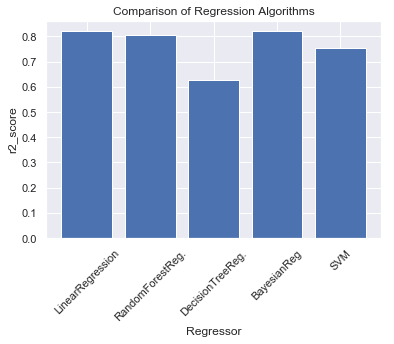

In [100]:
y = np.array([r2_score(y_test,y_head_lr),r2_score(y_test,y_head_rfr),r2_score(y_test,y_head_dtr),r2_score(y_test,y_head_bayes),r2_score(y_test,y_head_vector)])
x = ["LinearRegression","RandomForestReg.","DecisionTreeReg.",'BayesianReg','SVM']
plt.bar(x,y)
plt.title("Comparison of Regression Algorithms")
plt.xticks(rotation=45)
plt.xlabel("Regressor")
plt.ylabel("r2_score")
plt.show()

Comments: Linear and Bayesian are the best regression models

# Classification

In [110]:
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

graduate=pd.read_csv('Admission_Predict.csv')

# it may be needed in the future.
serialNo = graduate["Serial No."].values
graduate.drop(["Serial No."],axis=1,inplace = True)

graduate=graduate.rename(columns = {'Chance of Admit ':'Chance of Admit'})
y = graduate["Chance of Admit"].values
x = graduate.drop(["Chance of Admit"],axis=1)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=.2,random_state=42)

scaler = MinMaxScaler()# escala as features entre 0 e 1.

X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.fit_transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

y_train_01 = [1 if each > 0.8 else 0 for each in y_train]
y_test_01  = [1 if each > 0.8 else 0 for each in y_test]

# list to array
y_train_01 = np.array(y_train_01)
y_test_01 = np.array(y_test_01)

LR: 0.918750 (0.061237)
LDA: 0.934375 (0.045178)
KNN: 0.900000 (0.058962)
CART: 0.862500 (0.067315)
NB: 0.890625 (0.064424)
SVM: 0.921875 (0.070226)


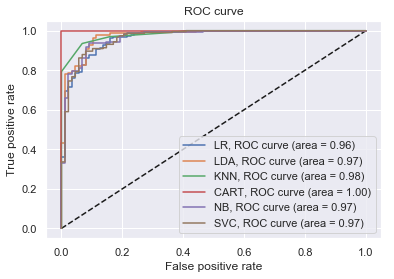

--------------------------
LogisticRegression Report
--------------------------
accuracy = 0.9125
confusion matrix [[51  0]
 [ 7 22]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.94        51
           1       1.00      0.76      0.86        29

   micro avg       0.91      0.91      0.91        80
   macro avg       0.94      0.88      0.90        80
weighted avg       0.92      0.91      0.91        80

--------------------------
LinearDiscriminantAnalysis Report
--------------------------
accuracy = 0.9375
confusion matrix [[51  0]
 [ 5 24]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        51
           1       1.00      0.83      0.91        29

   micro avg       0.94      0.94      0.94        80
   macro avg       0.96      0.91      0.93        80
weighted avg       0.94      0.94      0.94        80

--------------------------
KNeighborsClassifier Report
---------------

In [113]:
seed = 7
scoring = 'accuracy'

models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X_train, y_train_01,cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)


from sklearn import metrics

lr=LogisticRegression().fit(X_train,y_train_01)
prob_lr=lr.predict_proba(X_train)

lda=LinearDiscriminantAnalysis().fit(X_train,y_train_01)
prob_lda=lda.predict_proba(X_train)

knn=KNeighborsClassifier().fit(X_train,y_train_01)
prob_knn=knn.predict_proba(X_train)

cart=DecisionTreeClassifier().fit(X_train,y_train_01)
prob_cart=cart.predict_proba(X_train)

gnb=GaussianNB().fit(X_train,y_train_01)
prob_gnb=gnb.predict_proba(X_train)

svm=SVC(probability=True).fit(X_train,y_train_01)
prob_svm=svm.predict_proba(X_train)


#Compute the ROC curve: true positives/false positives

tpr_lr,fpr_lr,thresh_lr=metrics.roc_curve(y_train_01,prob_lr[:,0])
tpr_lda,fpr_lda,thresh_lda=metrics.roc_curve(y_train_01,prob_lda[:,0])
tpr_knn,fpr_knn,thresh_knn=metrics.roc_curve(y_train_01,prob_knn[:,0])
tpr_cart,fpr_cart,thresh_cart=metrics.roc_curve(y_train_01,prob_cart[:,0])
tpr_gnb,fpr_gnb,thresh_gnb=metrics.roc_curve(y_train_01,prob_gnb[:,0])
tpr_svm,fpr_svm,thresh_svm=metrics.roc_curve(y_train_01,prob_svm[:,0])

#Area under Curve (AUC)
from sklearn.metrics import auc

roc_auc_lr = auc(fpr_lr, tpr_lr)
roc_auc_lda = auc(fpr_lda, tpr_lda)
roc_auc_knn = auc(fpr_knn, tpr_knn)
roc_auc_cart = auc(fpr_cart, tpr_cart)
roc_auc_gnb = auc(fpr_gnb, tpr_gnb)
roc_auc_svm = auc(fpr_svm, tpr_svm)

#Plotting the ROC curves


plt.figure()
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr, tpr_lr, label='LR, ROC curve (area = %0.2f)' % roc_auc_lr)
plt.plot(fpr_lda, tpr_lda, label='LDA, ROC curve (area = %0.2f)' % roc_auc_lda)
plt.plot(fpr_knn, tpr_knn, label='KNN, ROC curve (area = %0.2f)' % roc_auc_knn)
plt.plot(fpr_cart, tpr_cart, label='CART, ROC curve (area = %0.2f)' % roc_auc_cart)
plt.plot(fpr_gnb, tpr_gnb, label='NB, ROC curve (area = %0.2f)' % roc_auc_gnb)
plt.plot(fpr_svm, tpr_svm, label='SVC, ROC curve (area = %0.2f)' % roc_auc_svm)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

# Make predictions on validation dataset
print("--------------------------")
print("LogisticRegression Report")
print("--------------------------")
predictions_lr = lr.predict(X_test)
print("accuracy =",accuracy_score(y_test_01, predictions_lr))
print("confusion matrix",confusion_matrix(y_test_01, predictions_lr))
print(classification_report(y_test_01, predictions_lr))

print("--------------------------")
print("LinearDiscriminantAnalysis Report")
print("--------------------------")
predictions_lda = lda.predict(X_test)
print("accuracy =",accuracy_score(y_test_01, predictions_lda))
print("confusion matrix",confusion_matrix(y_test_01, predictions_lda))
print(classification_report(y_test_01, predictions_lda))

print("--------------------------")
print("KNeighborsClassifier Report")
print("--------------------------")
predictions_knn = knn.predict(X_test)
print("accuracy =",accuracy_score(y_test_01, predictions_knn))
print("confusion matrix",confusion_matrix(y_test_01, predictions_knn))
print(classification_report(y_test_01, predictions_knn))

print("--------------------------")
print("DecisionTreeClassifier Report")
print("--------------------------")
predictions = cart.predict(X_test)
print("accuracy =",accuracy_score(y_test_01, predictions))
print("confusion matrix",confusion_matrix(y_test_01, predictions))
print(classification_report(y_test_01, predictions))

print("--------------------------")
print("GaussianNB Report")
print("--------------------------")
predictions_gnb = gnb.predict(X_test)
print("accuracy =",accuracy_score(y_test_01, predictions_gnb))
print("confusion matrix",confusion_matrix(y_test_01, predictions_gnb))
print(classification_report(y_test_01, predictions_gnb))

print("--------------------------")
print("SVC Report")
print("--------------------------")
predictions_svm = svm.predict(X_test)
print("accuracy =",accuracy_score(y_test_01, predictions_svm))
print("confusion matrix",confusion_matrix(y_test_01, predictions_svm))
print(classification_report(y_test_01, predictions_svm))


Comments: LDA is the best classifier